In [1]:
import numpy as np
import phate, scprep
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
colors = {'mustard': '#E1AD01', 'black': '#000000', 'gray': '#808080'}

In [3]:
clist = ['gray', 'black', 'mustard']

In [4]:
sns.set(font_scale=1.2, style='white')

In [5]:
dirac_embeddings = {}
dirac_embeddings['GSPA'] = np.load('results/GSPA_64.npy')
dirac_embeddings['GSPA_QR'] = np.load('results/GSPA_QR_64.npy')
dirac_embeddings['MAGIC'] = np.load('results/MAGIC_64.npy')

In [6]:
methods = ['GSPA', 'GSPA_QR', 'MAGIC']

In [7]:
index = np.array(list(range(0, 10000-0, 64)))
labels_y = (np.array(list(range(10000))) / 10000)[index]

In [8]:
phates = {}
ev_spearman = {}

In [9]:
for method in methods:
    phate_op = phate.PHATE(verbose=0)
    phates[method] = phate_op.fit_transform(dirac_embeddings[method])
    ev_spearman[method] = spearmanr(phate_op.graph.to_pygsp().U[:, 1], labels_y).correlation

2024-06-24 12:31:57,889:[WARNING](pygsp.graphs.graph._check_fourier_properties): The Fourier basis G.U is not available, we need to compute the Fourier basis. Explicitly call G.compute_fourier_basis() once beforehand to suppress the warning.
2024-06-24 12:31:58,154:[WARNING](pygsp.graphs.graph._check_fourier_properties): The Fourier basis G.U is not available, we need to compute the Fourier basis. Explicitly call G.compute_fourier_basis() once beforehand to suppress the warning.
2024-06-24 12:31:58,424:[WARNING](pygsp.graphs.graph._check_fourier_properties): The Fourier basis G.U is not available, we need to compute the Fourier basis. Explicitly call G.compute_fourier_basis() once beforehand to suppress the warning.


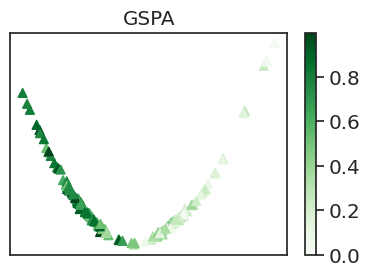

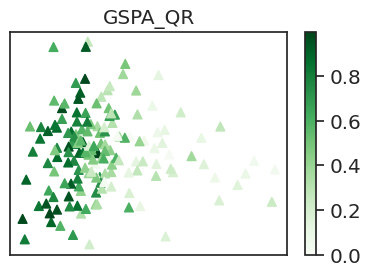

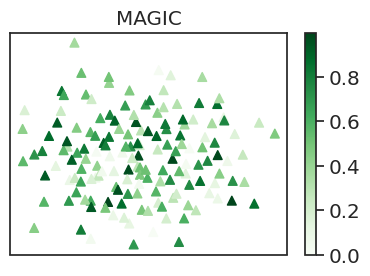

In [10]:
for method in methods:
    scprep.plot.scatter2d(phates[method], ticks=None, c=labels_y, cmap='Greens', title=method, figsize=(4,3), dpi=200,
                          filename=f'figures/{method}_dirac_embedding.png', marker='^', s=40)

/tmp/ipykernel_1614794/2890924934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=methods, y=[np.abs(ev_spearman[name]) for name in methods], palette=[colors[c] for c in clist], )
/tmp/ipykernel_1614794/2890924934.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)


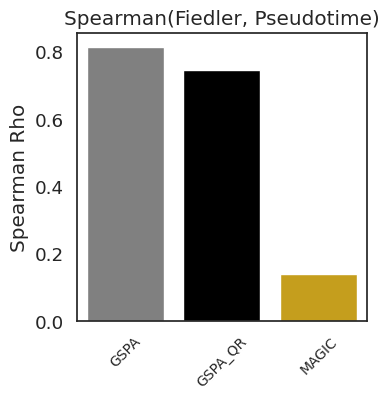

In [11]:
fig,ax = plt.subplots(figsize=(4,4))
sns.barplot(x=methods, y=[np.abs(ev_spearman[name]) for name in methods], palette=[colors[c] for c in clist], )
plt.xticks(rotation=45)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.ylabel('Spearman Rho')
plt.tight_layout()
plt.title('Spearman(Fiedler, Pseudotime)')
fig.savefig('figures/ev_corr.png', dpi=200)